In [1]:
# Importing libraries. The same will be used throughout the article.

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the boston housing data

from sklearn.datasets import load_boston
Boston = load_boston()
boston = pd.DataFrame(Boston.data)

# Importing libraries for scaling the data and splitting it into test and training

from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split

boston = pd.DataFrame(scale(boston)) # scaling the data to unit variance and zero mean
boston.columns = Boston.feature_names

X_train, X_test, Y_train, Y_test = train_test_split(boston, Boston.target, train_size=0.8, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


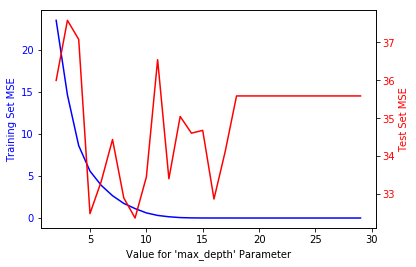

In [3]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(boston, Boston.target, train_size=0.8)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from os import system
import matplotlib.image as mpimg

mse_train = list()
mse_test = list()


for d in range(2,30):
    clf = tree.DecisionTreeRegressor(max_depth = d,random_state = 20)
    clf = clf.fit(X_train, Y_train)
    a = metrics.mean_squared_error(Y_train, clf.predict(X_train))
    b = metrics.mean_squared_error(Y_test, clf.predict(X_test))
    mse_train.append(a)
    mse_test.append(b)
#     print("MSE_train: %.4f" % a + " for max_depth = " + str(d))
#     print("MSE_test: %.4f" % b + " for max_depth = " + str(d))

    
    
# Now let's plot the performance of the models on a dual axis
depth_range = range(2,30)
fig, ax1 = plt.subplots()
ax1.plot(depth_range, mse_train, 'b-')
ax1.set_xlabel("Value for 'max_depth' Parameter")
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Training Set MSE', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(depth_range, mse_test, 'r-')
ax2.set_ylabel('Test Set MSE', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()
    


MSE_train: 5.5819 for max_depth = 5
MSE_test: 32.4888 for max_depth = 5
Features sorted by their score:
[(0.58289999999999997, 'RM'), (0.23369999999999999, 'LSTAT'), (0.080500000000000002, 'DIS'), (0.041300000000000003, 'CRIM'), (0.024899999999999999, 'NOX'), (0.019199999999999998, 'PTRATIO'), (0.011299999999999999, 'B'), (0.0040000000000000001, 'INDUS'), (0.0012999999999999999, 'TAX'), (0.00089999999999999998, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'CHAS')]


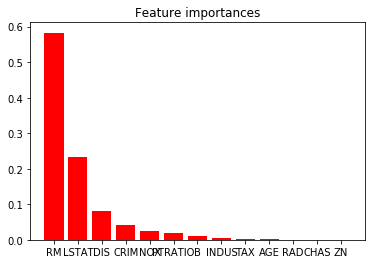

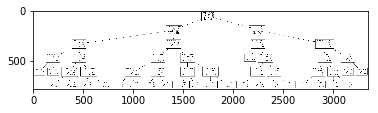

In [4]:
dtree = tree.DecisionTreeRegressor(max_depth = 5,random_state = 20)
dtree = dtree.fit(X_train, Y_train)

f = metrics.mean_squared_error(Y_train, dtree.predict(X_train))
g = metrics.mean_squared_error(Y_test, dtree.predict(X_test))

print("MSE_train: %.4f" % f + " for max_depth = 5")
print("MSE_test: %.4f" % g + " for max_depth = 5" )

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), dtree.feature_importances_), X_train.columns), 
             reverse=True))

indices = np.argsort(dtree.feature_importances_)[::-1]
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), dtree.feature_importances_[indices],
       color="r",  align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

a=tree.export_graphviz(dtree,out_file='tree.dot',feature_names=X_train.columns)

system("dot -Tpng tree.dot -o tree.png")

img=mpimg.imread('tree.png')
imgplot = plt.imshow(img)


In [5]:
import numpy as np
import time as time
import numpy as np

from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.datasets import load_digits
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=30)
rf.fit(X_train,Y_train)

print("mse_train: " + str(metrics.mean_squared_error(Y_train,rf.predict(X_train))))
print("mse_test: " + str(metrics.mean_squared_error(Y_test,rf.predict(X_test))))

# Utility function to report best scores

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

model = RandomForestRegressor(random_state=30)
param_grid = { "n_estimators"      : [50,250,500],
           "max_features"      : ['auto','sqrt','log2'],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}
grid_search = GridSearchCV(model, param_grid, cv=3)
start = time.time()
grid_search.fit(X_train, Y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)
print(grid_search.best_params_)



/usr/lib64/python3.4/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


mse_train: 2.13005816832
mse_test: 14.0976676471
GridSearchCV took 139.20 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.863 (std: 0.050)
Parameters: {'max_features': 'sqrt', 'bootstrap': False, 'min_samples_split': 2, 'max_depth': 10, 'n_estimators': 500}

Model with rank: 2
Mean validation score: 0.863 (std: 0.050)
Parameters: {'max_features': 'log2', 'bootstrap': False, 'min_samples_split': 2, 'max_depth': 10, 'n_estimators': 500}

Model with rank: 3
Mean validation score: 0.861 (std: 0.051)
Parameters: {'max_features': 'sqrt', 'bootstrap': False, 'min_samples_split': 2, 'max_depth': 20, 'n_estimators': 500}

{'max_features': 'sqrt', 'bootstrap': False, 'min_samples_split': 2, 'max_depth': 10, 'n_estimators': 500}


mse_train: 0.528547496844
mse_test: 15.7677299633
Features sorted by their score:
[(0.26989999999999997, 'RM'), (0.26600000000000001, 'LSTAT'), (0.076399999999999996, 'INDUS'), (0.069599999999999995, 'NOX'), (0.064399999999999999, 'PTRATIO'), (0.063200000000000006, 'CRIM'), (0.061400000000000003, 'DIS'), (0.039399999999999998, 'AGE'), (0.036299999999999999, 'TAX'), (0.023, 'B'), (0.0149, 'ZN'), (0.010800000000000001, 'RAD'), (0.0048999999999999998, 'CHAS')]


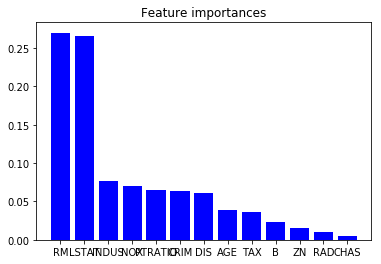

In [6]:
# params = {'min_samples_split': 2, 'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
rf = RandomForestRegressor(random_state=30,min_samples_split=4, n_estimators=500, bootstrap=False,
                           max_features='log2',max_depth=10)
rf.fit(X_train,Y_train)

print("mse_train: " + str(metrics.mean_squared_error(Y_train,rf.predict(X_train))))
print("mse_test: " + str(metrics.mean_squared_error(Y_test,rf.predict(X_test))))

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train.columns), 
             reverse=True))

indices = np.argsort(rf.feature_importances_)[::-1]
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), rf.feature_importances_[indices],
       color="b",  align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=30)
gb.fit(X_train,Y_train)

print("mse_train: " + str(metrics.mean_squared_error(Y_train,gb.predict(X_train))))
print("mse_test: " + str(metrics.mean_squared_error(Y_test,gb.predict(X_test))))

# Utility function to report best scores

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

model = GradientBoostingRegressor(random_state=30)
param_grid = { "n_estimators"      : [250, 500, 1000],
           "max_features"      : ['auto','sqrt','log2'],
           "max_depth"         : [4, 8, 16],
#            "min_samples_split" : [1, 2, 4] ,
           "learning_rate": [0.01, 0.1]}
grid_search = GridSearchCV(model, param_grid, cv=3)
start = time.time()
grid_search.fit(X_train, Y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)
print(grid_search.best_params_)



mse_train: 1.63404591143
mse_test: 12.1844890145
GridSearchCV took 51.42 seconds for 54 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.862 (std: 0.057)
Parameters: {'max_features': 'sqrt', 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.01}

Model with rank: 2
Mean validation score: 0.862 (std: 0.057)
Parameters: {'max_features': 'log2', 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.01}

Model with rank: 3
Mean validation score: 0.862 (std: 0.054)
Parameters: {'max_features': 'sqrt', 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.01}

{'max_features': 'sqrt', 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.01}


Features sorted by their score:
[(0.1986, 'RM'), (0.1767, 'LSTAT'), (0.11, 'DIS'), (0.10730000000000001, 'AGE'), (0.099299999999999999, 'CRIM'), (0.077299999999999994, 'B'), (0.072599999999999998, 'NOX'), (0.047600000000000003, 'PTRATIO'), (0.042999999999999997, 'INDUS'), (0.035200000000000002, 'TAX'), (0.0189, 'RAD'), (0.0094999999999999998, 'ZN'), (0.0040000000000000001, 'CHAS')]


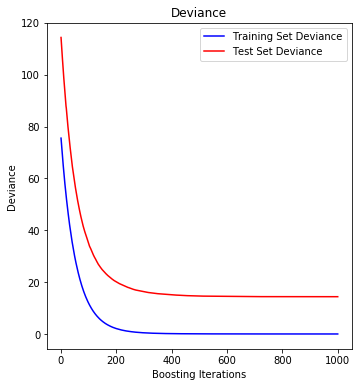

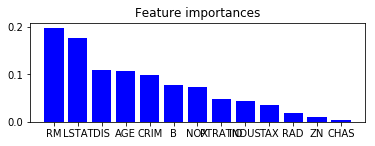

In [9]:
params = {'min_samples_split': 4, 'learning_rate': 0.01, 'n_estimators': 1000, 'max_depth': 8, 'max_features': 'sqrt'}

gb = GradientBoostingRegressor(**params)
gb.fit(X_train,Y_train)

# print("mse_train: " + str(metrics.mean_squared_error(Y_train,gb.predict(X_train))))
# print("mse_test: " + str(metrics.mean_squared_error(Y_test,gb.predict(X_test))))

# Fit regression model

# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gb.staged_predict(X_test)):
    test_score[i] = gb.loss_(Y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), gb.feature_importances_), X_train.columns), 
             reverse=True))

indices = np.argsort(gb.feature_importances_)[::-1]
# Plot the feature importances of the forest
plt.figure()
plt.subplot(2, 1, 2)
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), gb.feature_importances_[indices],
       color="b",  align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()